# **Zomato Restaurant Rating Prediction**


## **1. Business Objective** 
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. 


This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food.

The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place. So we will try to predict rating for particular restaurant.

## **2. Data Collection**

The dataset has been obtained from kaggle. Link : https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

The data is accurate to that available on the zomato website until 15 March 2019.

In [1]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Setting up some parameters for the workbook

plt.style.use('classic')
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [ ]:
# Importing sklearn libraries needed

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesClassifier
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import mean_squared_error

In [155]:
import re
import ast
from wordcloud import WordCloud, STOPWORDS
import pickle
import json

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modelling.

In [8]:
# Loading the dataset

file_path = "/content/drive/My Drive/Colab Datasets/Zomato/zomato.csv"
zomato_data = pd.read_csv(file_path)

In [9]:
# Checking the features and no. of records in the dataset.

print("The number of records are : ", zomato_data.shape[0])
print("The number of features are : ", zomato_data.shape[1])
print("The list of features is : ", zomato_data.columns)
zomato_data.head()

The number of records are :  51717
The number of features are :  17
The list of features is :  Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

##### There are 51717 records with 17 features in the dataset.

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.


In [10]:
# check for duplicate values

print("No. of duplicates records in the dataset : ", zomato_data.duplicated().sum())

No. of duplicates records in the dataset :  0


In [11]:
# Drop the duplicates

zomato_data = zomato_data.drop_duplicates()

In [12]:
# Checking basic info of the dataset

missing_stats = []

for col in zomato_data.columns:
    missing_stats.append((col, zomato_data[col].nunique(), zomato_data[col].isnull().sum() / zomato_data.shape[0], zomato_data[col].value_counts(normalize=True, dropna=False).values[0], zomato_data[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df

feature  unique_values  percent_missing  \
0                           url          51717         0.000000   
1                       address          11495         0.000000   
2                          name           8792         0.000000   
3                  online_order              2         0.000000   
4                    book_table              2         0.000000   
5                          rate             64         0.150337   
6                         votes           2328         0.000000   
7                         phone          14926         0.023358   
8                      location             93         0.000406   
9                     rest_type             93         0.004389   
10                   dish_liked           5271         0.542916   
11                     cuisines           2723         0.000870   
12  approx_cost(for two people)             70         0.006690   
13                 reviews_list          22513         0.000000   
14                    menu_item           9098         0.000000   
15              listed_in(type)              7         0.000000   
16              listed_in(city)             30         0.000000   

    percent_biggest_cat    type  
0              0.000019  object  
1              0.002475  object  
2              0.001856  object  
3              0.588665  object  
4              0.875302  object  
5              0.150337  object  
6              0.193882   int64  
7              0.023358  object  
8              0.099078  object  
9              0.369936  object  
10             0.542916  object  
11             0.056326  object  
12             0.146490  object  
13             0.146857  object  
14             0.766034  object  
15             0.501615  object  
16             0.063403  object

##### Observations:
Features rate, phone, location, rest_type, dish_liked, cuisines and approx_cost(for two people) have some missing values.



#### **3.1.1 Handling Missing Values**

Identifying the features that have some missing values and imputing them.

In [13]:
# Checking the feature "rate"

zomato_data["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
# Replacing values like "NEW" and "-" with "nan"

zomato_data["rate"] = zomato_data["rate"].replace("NEW", np.nan)
zomato_data["rate"] = zomato_data["rate"].replace("-", np.nan)

In [15]:
# Removing "/5" from the values and converting them to float values

zomato_data["rate"] = zomato_data["rate"].astype(str)
zomato_data["rate"] = zomato_data["rate"].apply(lambda r: r.replace('/5',''))
zomato_data["rate"] = zomato_data["rate"].apply(lambda r: float(r))

In [16]:
df_for_rate = zomato_data[zomato_data["rate"].isnull()]
df_for_rate.head()

url  \
72  https://www.zomato.com/bangalore/spicy-tandoor...   
75  https://www.zomato.com/bangalore/om-sri-vinaya...   
84  https://www.zomato.com/bangalore/chill-out-ban...   
90  https://www.zomato.com/bangalore/me-and-my-cak...   
91  https://www.zomato.com/bangalore/sunsadm-banas...   

                                              address                   name  \
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...          Spicy Tandoor   
75  39, S B M Colony, Near-Sita Circle, 1st Stage,...  Om Sri Vinayaka Chats   
84  161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...              Chill Out   
90  BDA Shopping Complex, 24th Cross Road, Siddann...         Me And My Cake   
91  Shop 18 , 3rd cross road,Markandeya Layout, Ba...                Sunsadm   

   online_order book_table  rate  votes           phone      location  \
72           No         No   NaN      0  +91 8050884222  Banashankari   
75           No         No   NaN      0  +91 8553206035  Banashankari   
84           No         No   NaN      0  +91 9341215167  Banashankari   
90           No         No   NaN      0  +91 9036070410  Banashankari   
91           No         No   NaN      0  +91 7829290358  Banashankari   

             rest_type dish_liked                cuisines  \
72         Quick Bites        NaN            North Indian   
75  Takeaway, Delivery        NaN  Street Food, Fast Food   
84         Quick Bites        NaN   South Indian, Chinese   
90            Delivery        NaN        Bakery, Desserts   
91  Takeaway, Delivery        NaN            South Indian   

   approx_cost(for two people)  \
72                         150   
75                         500   
84                         100   
90                         500   
91                         400   

                                         reviews_list menu_item  \
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
75                                                 []        []   
84  [('Rated 4.0', 'RATED\n  Good Location. Small ...        []   
90  [('Rated 1.0', 'RATED\n  Do not order anything...        []   
91                                                 []        []   

   listed_in(type) listed_in(city)  
72        Delivery    Banashankari  
75        Delivery    Banashankari  
84        Delivery    Banashankari  
90        Delivery    Banashankari  
91        Delivery    Banashankari

In [17]:
df_for_rate["reviews_list"][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

##### Observation:
Feature "reviews_list" contains ratings along with the reviews, so we can take the average of all the ratings present in the reviews provided the reviews are present for the restaurant.

In [18]:
def CalculateRatings(review):
    if len(review) > 2:
        reviews_list = re.findall(r"Rated [-+]?\d*\.\d+|\d+", review)
        rating = 0.0
        no_of_ratings = 0.0
        if len(reviews_list) > 0:
            for r in reviews_list:
                if "rated" in r.lower():
                    rate = float(re.findall(r"[-+]?\d*\.\d+|\d+", r)[0])
                    rating = rating + rate
                    no_of_ratings = no_of_ratings + 1   
        return rating / no_of_ratings
    else:
        return np.nan

In [19]:
# Filling in the average of all the ratings in the reviews and droping the records with no reviews

df_for_rate["rate"] = df_for_rate["reviews_list"].apply(CalculateRatings)
df_for_rate.dropna(subset=["rate"], inplace=True)

In [20]:
# Replaced some of the missing values

zomato_data["rate"] = zomato_data["rate"].fillna(df_for_rate["rate"])

In [21]:
# Dropping the records with missing values for feature "rate" due to the fact that this is a dependent feature.

zomato_data.dropna(subset=["rate"], inplace=True)
zomato_data.reset_index(inplace = True, drop = True)

In [22]:
zomato_data["rate"] = zomato_data["rate"].apply(lambda x : round(x, 2))

In [23]:
## ast.literal_eval raises an exception if the input isn't a valid Python datatype, so the code won't be executed if it's not.
# return to a list of tuples

zomato_data["reviews_list"] = zomato_data["reviews_list"].apply(lambda x: ast.literal_eval(x))

In [24]:
# "review_lists" contains different character which needs to be encoded to UTF-8 then decoded to ASCII code

def clear_text(t):
    return ' '.join([i[1] for i in t]).encode('utf8').decode('ascii', errors='replace')

In [25]:
zomato_data["processed_review"] = zomato_data["reviews_list"].apply(lambda x: clear_text(x))

In [26]:
zomato_data["processed_review"] = zomato_data["processed_review"].apply(lambda x : x.replace("RATED\n  ",'').replace('?','').replace('�','').replace('\n','').replace('.',' ').replace('Â',' ').strip().lower())

In [27]:
zomato_data["processed_review"][0]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha  food was fresh and good, service is good too  good for family hangout cheers its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  anyways we ordered ala carte items which took ages to come  

##### Observations:
If we try to read this review we can we can come to conclusion this text is enough to give restaurant rating. Also in this review some customer provide dishes name which they loved.

Eg: "lemon chicken", "chilli paratha food was fresh", "palak methi curry is a good" , "masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha food was fresh".

So we can use this values and try to fill missing 'dish_liked' values.

In [28]:
# Checking the feature "dishes_liked" and converting the values to lower case

zomato_data["dish_liked"] = zomato_data["dish_liked"].apply(lambda x : x.lower().strip() if isinstance(x, str) else x)

In [29]:
# Collect the dishes' names and make a menu list for all kind of unique dishes

menu_list = []
for dish_lst in zomato_data["dish_liked"].tolist():
    if isinstance(dish_lst, str) and len(dish_lst) > 0:
        for dish in dish_lst.split(','):
            menu_list.append(dish.strip())
            
menu_set = set(menu_list)
print("The number of dished in the menu is : ", len(menu_list))
print("The dishes in the menu list are : \n", menu_list)

The number of dished in the menu is :  128806
The dishes in the menu list are : 
 ['pasta', 'lunch buffet', 'masala papad', 'paneer lajawab', 'tomato shorba', 'dum biryani', 'sweet corn soup', 'momos', 'lunch buffet', 'chocolate nirvana', 'thai green curry', 'paneer tikka', 'dum biryani', 'chicken biryani', 'churros', 'cannelloni', 'minestrone soup', 'hot chocolate', 'pink sauce pasta', 'salsa', 'veg supreme pizza', 'masala dosa', 'panipuri', 'gol gappe', 'onion rings', 'pasta', 'kadhai paneer', 'salads', 'salad', 'roti', 'jeera rice', 'farmhouse pizza', 'chocolate banana', 'virgin mojito', 'pasta', 'paneer tikka', 'lime soda', 'prawn pizza', 'pizza', 'mocktails', 'coffee', 'nachos', 'salad', 'pasta', 'sandwiches', 'waffles', 'pasta', 'coleslaw sandwich', 'choco waffle', 'tacos', 'momos', 'cheese nachos', 'waffles', 'pasta', 'crispy chicken', 'honey chilli chicken', 'sandwich', 'coffee', 'crepe', 'mocktails', 'peri fries', 'lasagne', 'pizza', 'chicken bbq wings', 'virgin mojito', 'nach

In [30]:
# Creating a new feature for the dishes extracted from reviews

zomato_data["dish_from_review"] = zomato_data["processed_review"].apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [31]:
zomato_data["dish_from_review"] = zomato_data["dish_from_review"].apply(lambda x: np.nan if x=="" else x)

In [32]:
# Filling in the missing values from "dishes_liked" from the feature "dish_from_review"

zomato_data["dish_liked"] = zomato_data["dish_liked"].fillna(zomato_data["dish_from_review"])

In [33]:
# Dropping the rows with no dishes_liked

zomato_data.dropna(subset=["dish_liked"], inplace=True)
zomato_data.reset_index(inplace = True, drop = True)

In [34]:
# Checking the feature "rest_type" for the frequency of the unique values present in the dataset

zomato_data["rest_type"].value_counts()

Quick Bites                      13369
Casual Dining                     9460
Cafe                              3392
Dessert Parlor                    1641
Delivery                          1602
Takeaway, Delivery                1252
Casual Dining, Bar                1062
Beverage Shop                      560
Bar                                556
Bakery                             530
Food Court                         496
Bar, Casual Dining                 410
Lounge                             376
Pub                                343
Fine Dining                        335
Casual Dining, Cafe                313
Sweet Shop                         285
Beverage Shop, Quick Bites         243
Pub, Casual Dining                 233
Bakery, Quick Bites                201
Mess                               183
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Bakery                       158
Sweet Shop, Quick Bites            156
Kiosk                    

In [35]:
# Filling the missing values with most frequent "rest_type"

zomato_data["rest_type"] = zomato_data["rest_type"].fillna(zomato_data["rest_type"].value_counts().index[0])

In [36]:
# Checking the feature "approx_cost(for two people)"

zomato_data["approx_cost(for two people)"] = zomato_data["approx_cost(for two people)"].astype(str)
zomato_data["approx_cost(for two people)"] = zomato_data["approx_cost(for two people)"].apply(lambda x : x.replace(',',''))
zomato_data["approx_cost(for two people)"] = zomato_data["approx_cost(for two people)"].apply(lambda x : float(x))

In [37]:
# Checking the basic stats for the feature

zomato_data["approx_cost(for two people)"].describe()

count    39683.000000
mean       611.559358
std        466.116289
min         40.000000
25%        300.000000
50%        500.000000
75%        750.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

In [38]:
# Filling the missing values with the median of the feature

zomato_data["approx_cost(for two people)"] = zomato_data["approx_cost(for two people)"].fillna(zomato_data["approx_cost(for two people)"].median())

In [39]:
# Dropping the rows with no dishes_liked

zomato_data.dropna(subset=["cuisines"], inplace=True)
zomato_data.reset_index(inplace = True, drop = True)

In [40]:
zomato_data.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                           844
location                          0
rest_type                         0
dish_liked                        0
cuisines                          0
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
processed_review                  0
dish_from_review               1785
dtype: int64

#### **3.1.2 Removing Outliers**

Checking for outliers and removing them.

In [41]:
# Replaced some of the missing values
# Filling in the average of all the ratings in the reviews and droping the records with no reviews

df_for_rate["rate"] = df_for_rate["reviews_list"].apply(CalculateRatings)
df_for_rate.dropna(subset=["rate"], inplace=True)
zomato_data["rate"] = zomato_data["rate"].fillna(df_for_rate["rate"])

In [42]:
# Checking for outlier values in feature "rate". Rating is generally between 0 to 5, so we can check for the records with ratings outside of this range.

df_for_rate = zomato_data[(zomato_data["rate"] < 0) | (zomato_data["rate"] > 5)]
len(df_for_rate)

0

#### **3.1.3 Dropping unnecessary features**

Dropping features that are not useful.

In [43]:
# Dropping unnecessary features

features_to_drop = ["url", "address", "phone", "listed_in(city)"]
zomato_data.drop(columns=features_to_drop, axis=1, inplace=True)

In [44]:
## rename 'approx_cost(for two people)' to 'average_cost'

zomato_data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [45]:
zomato_data.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  pasta, lunch buffet, masala papad, paneer laja...   
1        Casual Dining  momos, lunch buffet, chocolate nirvana, thai g...   
2  Cafe, Casual Dining  churros, cannelloni, minestrone soup, hot choc...   
3          Quick Bites                                        masala dosa   
4        Casual Dining                                panipuri, gol gappe   

                         cuisines  average_cost  \
0  North Indian, Mughlai, Chinese         800.0   
1     Chinese, North Indian, Thai         800.0   
2          Cafe, Mexican, Italian         800.0   
3      South Indian, North Indian         300.0   
4        North Indian, Rajasthani         600.0   

                                        reviews_list menu_item  \
0  [(Rated 4.0, RATED\n  A beautiful place to din...        []   
1  [(Rated 4.0, RATED\n  Had been here for dinner...        []   
2  [(Rated 3.0, RATED\n  Ambience is not that goo...        []   
3  [(Rated 4.0, RATED\n  Great food and proper Ka...        []   
4  [(Rated 4.0, RATED\n  Very good restaurant in ...        []   

  listed_in(type)                                   processed_review  \
0          Buffet  a beautiful place to dine in the interiors tak...   
1          Buffet  had been here for dinner with family  turned o...   
2          Buffet  ambience is not that good enough and it's not ...   
3          Buffet  great food and proper karnataka style full mea...   
4          Buffet  very good restaurant in neighbourhood  buffet ...   

                                    dish_from_review  
0       rice, halwa, breads, paratha, chaap, chicken  
1  rice, momos, fish, tikka, mutton, roti, chicke...  
2  rice, pizza, cheesecake, pasta, mocktails, chu...  
3                             rice, vegetarian, roti  
4                                    paratha, kulcha

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

### **3.2.1 Univariate Analysis**

Analyzing each feature inidividually to gain insights from the data and discover any outliers.

In [46]:
# Checking the feature "name" to see the unique types of restaurants in the city

zomato_data["name"].value_counts()

Onesta               85
Cafe Coffee Day      80
Empire Restaurant    71
Five Star Chicken    60
Pizza Hut            60
                     ..
Maruti Sweets         1
G8 Punjabi Tadka      1
Taishty               1
Luo Han               1
Shahi Rasoi           1
Name: name, Length: 6291, dtype: int64

Text(0.5, 1.0, 'Top 10 Restaurants Chain in the City')

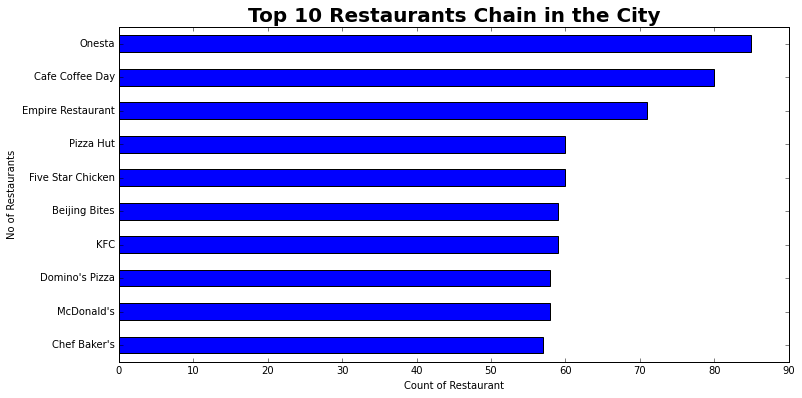

In [47]:
plt.figure(figsize=(12,6))
ax = zomato_data["name"].value_counts()[:10].sort_values().plot(kind='barh')
plt.ylabel('No of Restaurants')
plt.xlabel('Count of Restaurant')
plt.title("Top 10 Restaurants Chain in the City", fontsize=20, weight='bold')

##### Observations:
1. There are 6291 unique restaurants in the city.
2. Food chains like Onesta, CCD, Empire Restaurant, Pizza Hut and Five Star Chicken forms the top 5 restaurant chains in the city.

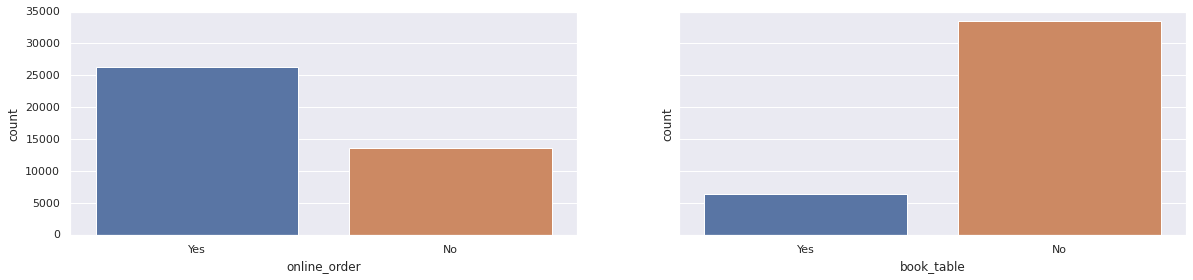

In [48]:
# Plotting the countplot for the few categorical features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True)

sns.countplot("online_order", data=zomato_data, ax=axes[0])
sns.countplot("book_table", data=zomato_data, ax=axes[1])

##### Observations:
1. There are close to twice the number of restaurants that take the order online as compared to ones that do not take order online
2. Most of the restaurants do have table booking 

The basic statistics for the feature is :
 count    39952.000000
mean         3.732787
std          0.524855
min          1.000000
25%          3.500000
50%          3.800000
75%          4.100000
max          5.000000
Name: rate, dtype: float64
The number of unique values in the feature is : 114


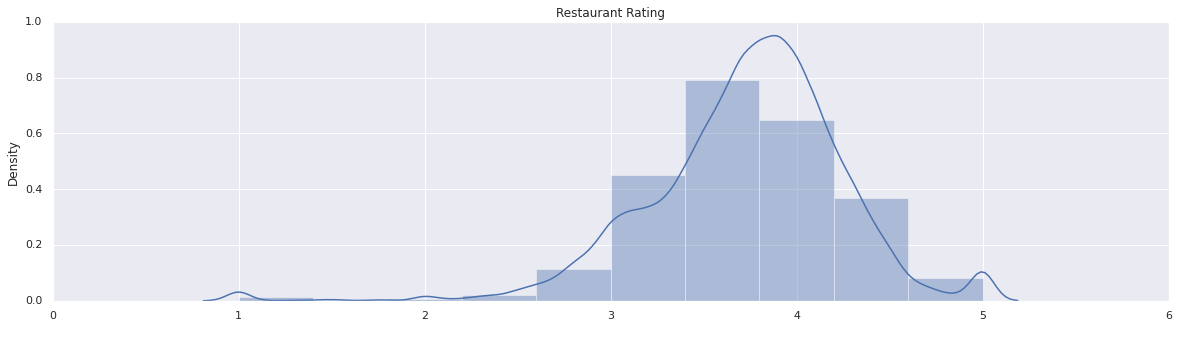

In [49]:
# Checking feature "rate"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(zomato_data["rate"], bins=10 , ax=ax1)
ax1.set_title("Restaurant Rating")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", zomato_data["rate"].describe())
print("The number of unique values in the feature is :", zomato_data["rate"].nunique())

##### Observations:
1. From the distribution, it looks like that that majority of the  ratings are in between 3-4.

The basic statistics for the feature is :
 count    39952.000000
mean       365.317481
std        898.351696
min          0.000000
25%         22.000000
50%         80.000000
75%        294.000000
max      16832.000000
Name: votes, dtype: float64
The number of unique values in the feature is : 2326


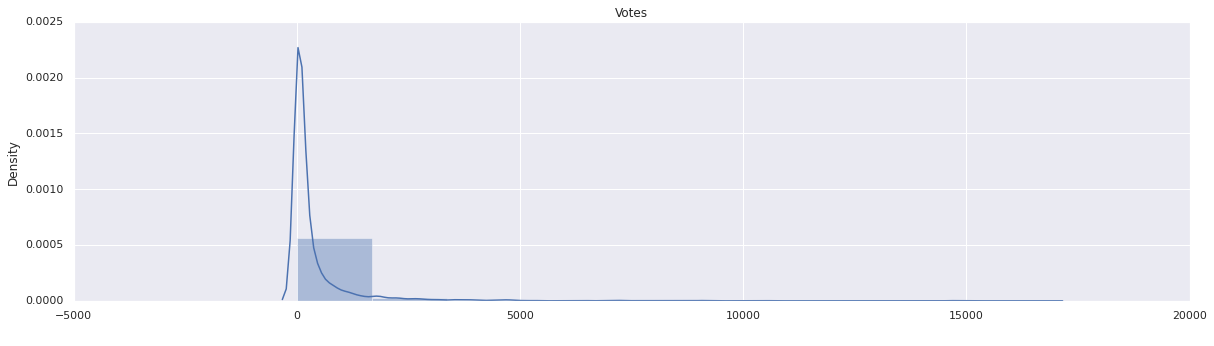

In [50]:
# Checking feature "rate"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(zomato_data["votes"], bins=10 , ax=ax1)
ax1.set_title("Votes")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", zomato_data["votes"].describe())
print("The number of unique values in the feature is :", zomato_data["votes"].nunique())

##### Observations:
1. The distributions is highly right skewed with 50% of the records have votes less than 80.

In [51]:
# Checking the feature "location" to see the unique locations of the restaurants in the city

print("The no. of unique locations in the city are : ", zomato_data["location"].nunique())
print("The list of locations in the city are : \n", zomato_data["location"].value_counts())

The no. of unique locations in the city are :  90
The list of locations in the city are : 
 BTM                              3714
Koramangala 5th Block            2335
HSR                              1979
Indiranagar                      1857
JP Nagar                         1660
Jayanagar                        1617
Whitefield                       1585
Marathahalli                     1412
Bannerghatta Road                1159
Koramangala 7th Block            1072
Koramangala 6th Block            1040
Brigade Road                     1013
Bellandur                         992
Koramangala 1st Block             847
Koramangala 4th Block             831
Ulsoor                            814
MG Road                           806
Sarjapur Road                     803
Electronic City                   784
Banashankari                      703
Kalyan Nagar                      695
Malleshwaram                      587
Richmond Road                     568
Residency Road                    

Text(0.5, 1.0, 'Top 10 Locations')

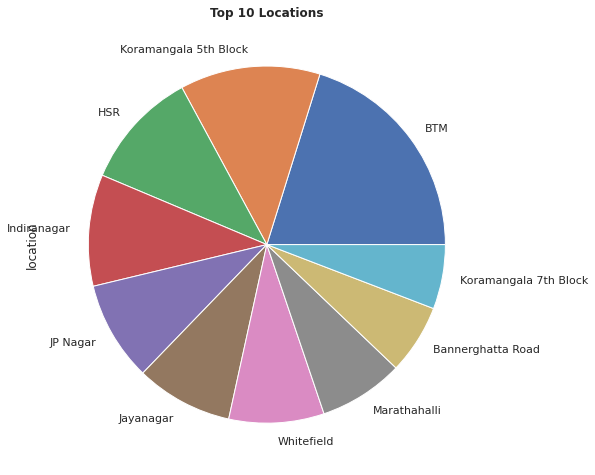

In [52]:
plt.figure(figsize=(20,8))
ax = zomato_data["location"].value_counts()[:10].plot(kind='pie')
plt.title('Top 10 Locations', weight='bold')

##### Observations:
1. BTM has the highest number of restaurants of the city.

In [53]:
# Extracting rest_type from the dataset

rest_type_list = []
def ExtractRestaurantType(x):
    for c in x.split(','):
        rest_type_list.append(c.replace('Dining','').strip().lower())

In [54]:
zomato_data["rest_type"].apply(ExtractRestaurantType)
rest_type_set = set(rest_type_list)

In [55]:
print("The no. of rest_type in the city are : ", len(rest_type_set))
print("The set of rest_type in the city are : ", (rest_type_set))

The no. of rest_type in the city are :  24
The set of rest_type in the city are :  {'fine', 'casual', 'kiosk', 'dhaba', 'beverage shop', 'cafe', 'delivery', 'meat shop', 'club', 'microbrewery', 'mess', 'takeaway', 'bar', 'sweet shop', 'dessert parlor', 'confectionery', 'food truck', 'food court', 'bakery', 'quick bites', 'irani cafee', 'bhojanalya', 'pub', 'lounge'}


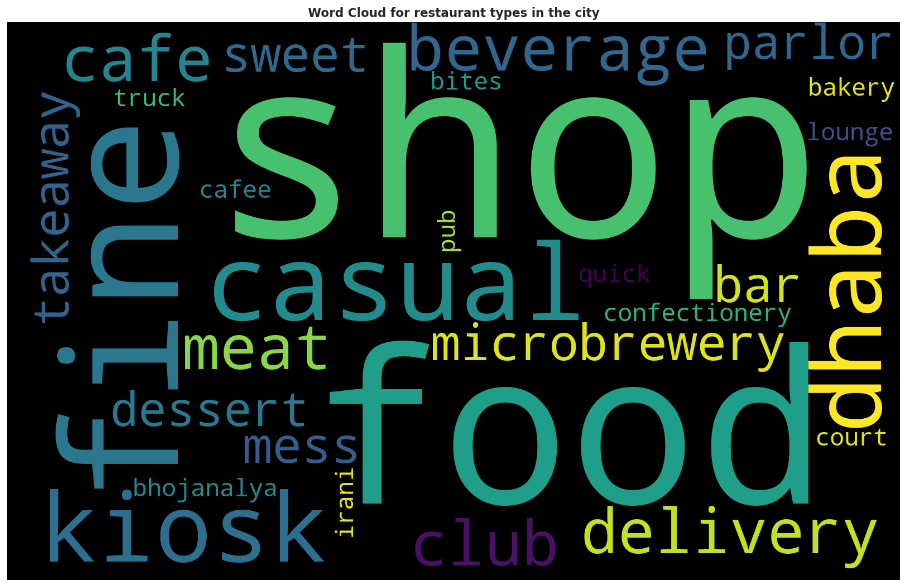

In [56]:
rt_word_cloud = ', '.join(rest_type_set)

plt.figure(figsize=(25,10))
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(rt_word_cloud))
wc.generate(rt_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for restaurant types in the city',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

In [57]:
# Checking the feature "rest_type" to see the unique restaurant types in the city

print("The no. of unique rest_type in the city are : ", zomato_data["rest_type"].nunique())
print("The list of rest_type in the city are : \n", zomato_data["rest_type"].value_counts())

The no. of unique rest_type in the city are :  86
The list of rest_type in the city are : 
 Quick Bites                      13518
Casual Dining                     9458
Cafe                              3392
Dessert Parlor                    1641
Delivery                          1596
Takeaway, Delivery                1252
Casual Dining, Bar                1062
Beverage Shop                      560
Bar                                556
Bakery                             530
Food Court                         496
Bar, Casual Dining                 410
Lounge                             376
Pub                                343
Fine Dining                        335
Casual Dining, Cafe                313
Sweet Shop                         285
Beverage Shop, Quick Bites         243
Pub, Casual Dining                 233
Bakery, Quick Bites                201
Mess                               183
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Baker

Text(0.5, 1.0, 'Top 10 Restaurant Types')

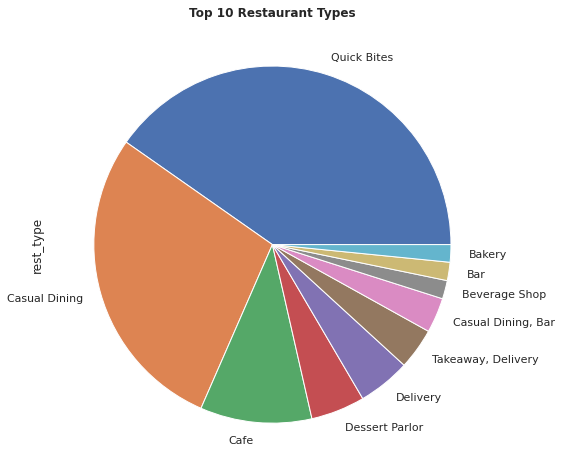

In [58]:
plt.figure(figsize=(20,8))
ax = zomato_data["rest_type"].value_counts()[:10].plot(kind='pie')
plt.title('Top 10 Restaurant Types', weight='bold')

##### Observations:
1. "Quick Bites" and "Casual Dining" forms the top two restaurant types in the city.

The basic statistics for the feature is :
 count    39952.000000
mean       610.823238
std        464.628780
min         40.000000
25%        300.000000
50%        500.000000
75%        750.000000
max       6000.000000
Name: average_cost, dtype: float64
The number of unique values in the feature is : 63


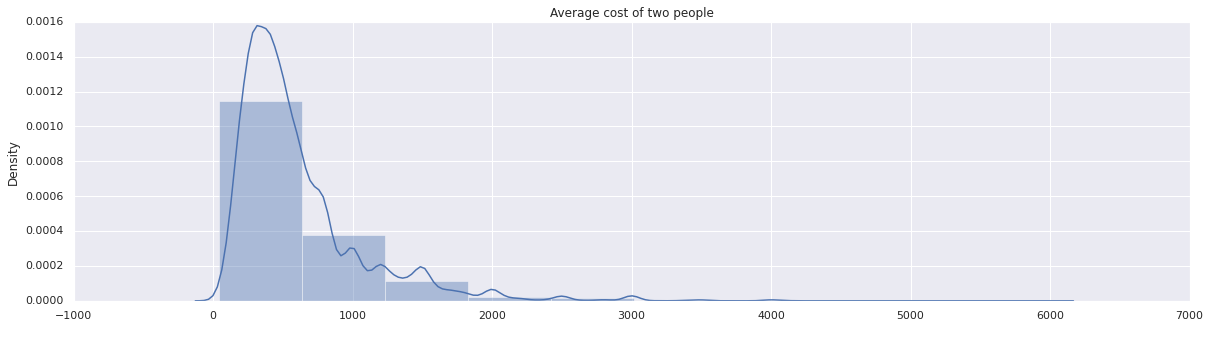

In [59]:
# Checking feature "average_cost"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(zomato_data["average_cost"], bins=10 , ax=ax1)
ax1.set_title("Average cost of two people")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", zomato_data["average_cost"].describe())
print("The number of unique values in the feature is :", zomato_data["average_cost"].nunique())

##### Observations:
1. The median avg cost remains to be Rs 500 while the distribution goes from 40 to 6000.
2. The distribution is highly right skewed.

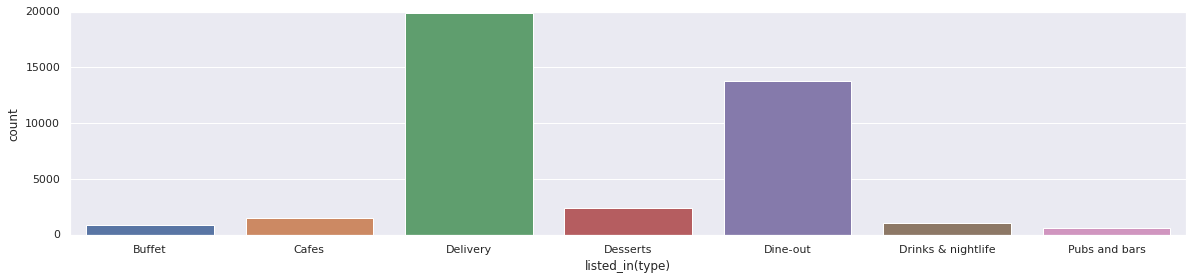

In [60]:
# Checking the feature "listed_in(type)" to see the unique restaurant types in the city

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(20, 4), sharey=True)

sns.countplot("listed_in(type)", data=zomato_data, ax=axes)

##### Observations:
1. "Delivery" and "Dine-out" are the most common listed_in(type)

Text(0, 0.5, 'Count')

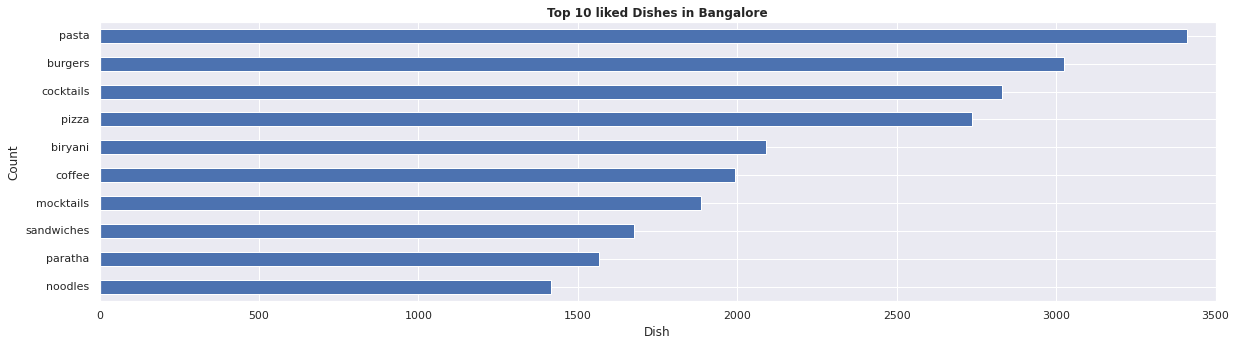

In [61]:
# Visualizing the top 10 dishes in the city

plt.figure(figsize=(20, 5)) 
pd.Series(menu_list).value_counts()[:10].sort_values().plot(kind='barh')
plt.title('Top 10 liked Dishes in Bangalore', weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

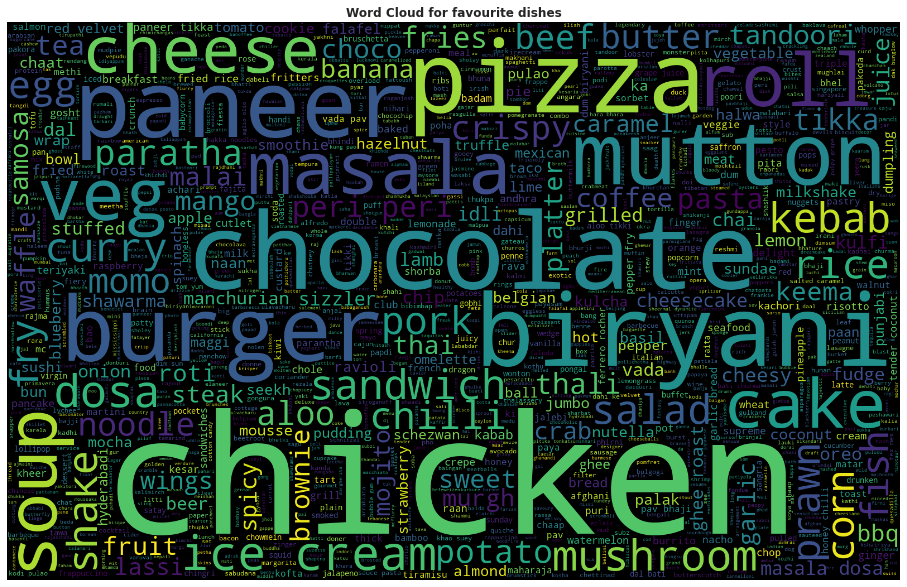

In [62]:
dish_word_cloud = ', '.join(menu_set)

plt.figure( figsize=(25,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(dish_word_cloud))
wc.generate(dish_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for favourite dishes',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

##### Observations:
1. "pasta" is the most liked food item in the city followed by "burgers", "cocktails" and "pizza"
2. In terms of beverages "cocktails", "coffee" and "mocktails are the most liked items.

In [63]:
# Extracting cuisines from the dataset

cuisines_list = []
def ExtractCuisines(x):
    for c in x.split(','):
        cuisines_list.append(c.strip().lower())

In [64]:
zomato_data["cuisines"].apply(ExtractCuisines)
cuisines_set = set(cuisines_list)

Text(0, 0.5, 'No. of restaurants')

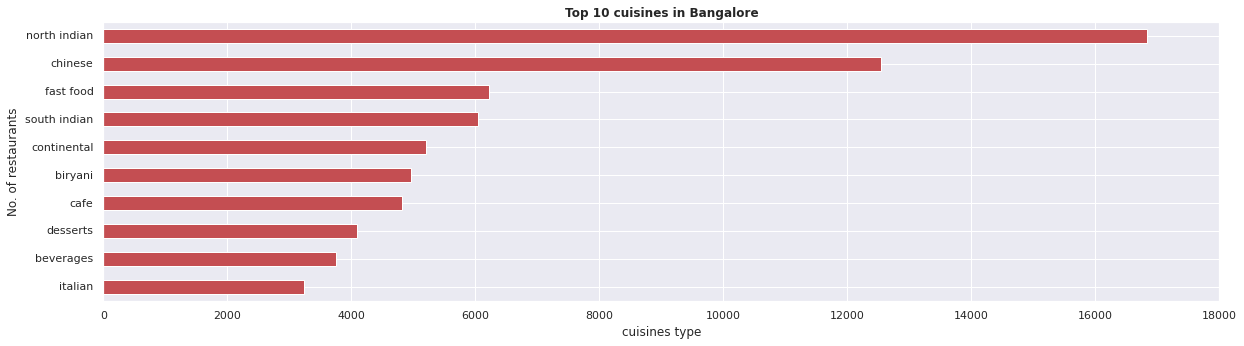

In [65]:
plt.figure(figsize=(20,5)) 
pd.Series(cuisines_list).value_counts()[:10].sort_values().plot(kind='barh', color='r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No. of restaurants')

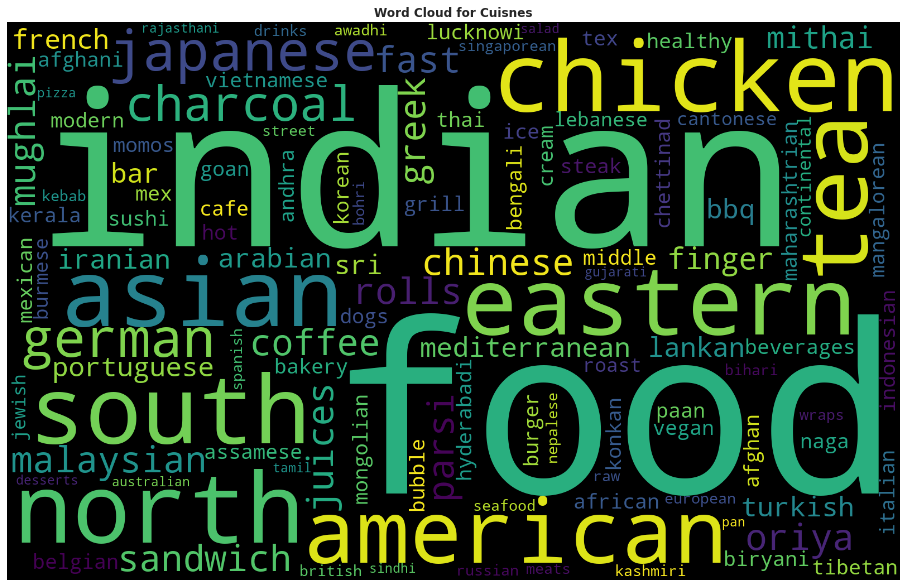

In [66]:
cuisines_word_cloud = ', '.join(cuisines_set)

plt.figure(figsize=(25,10))
wc = WordCloud(width=1600, height=1000, background_color="black", max_words=len(cuisines_word_cloud))
wc.generate(cuisines_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Cuisnes', weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

##### Observations:
1. "North Indian" food is the most represented cuisine in the restaurants of the city.
2. "chinese" is the second highest most represented cuisine in the restaurants of the city.

### **3.2.2 Bi-variate Analysis**

Analyzing multiple features together to discover relations, correlations and patterns. 

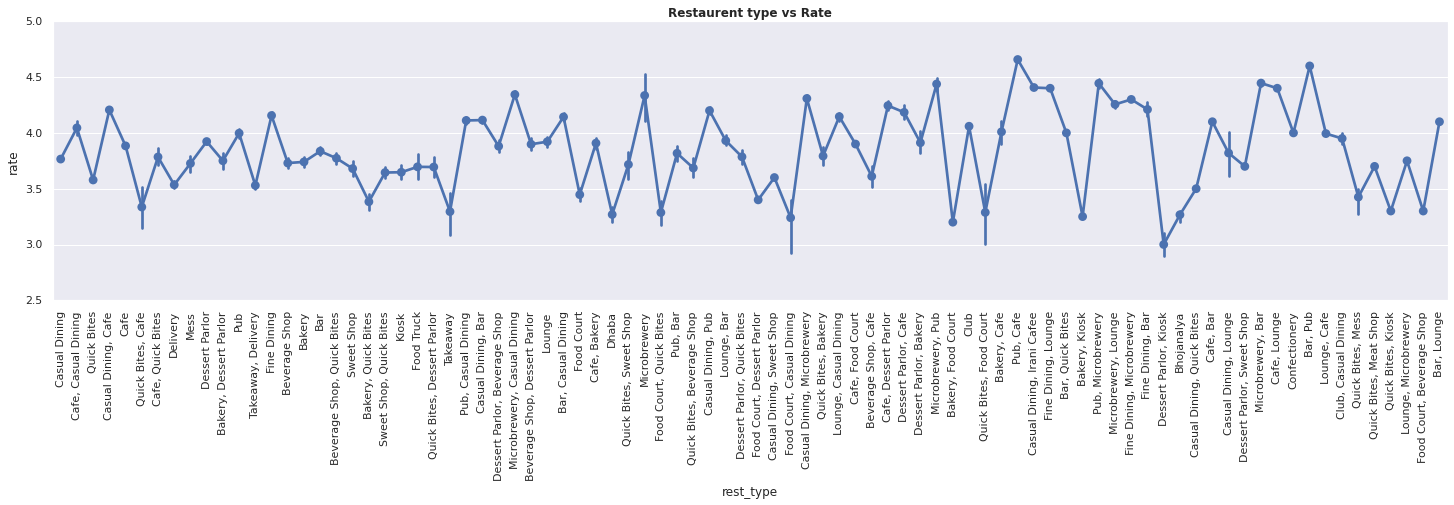

In [67]:
# Visualizing Rate vs Restaurant Type

f,ax = plt.subplots(figsize=(25,5))
g = sns.pointplot(x="rest_type", y="rate", data=zomato_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Rate vs online order')

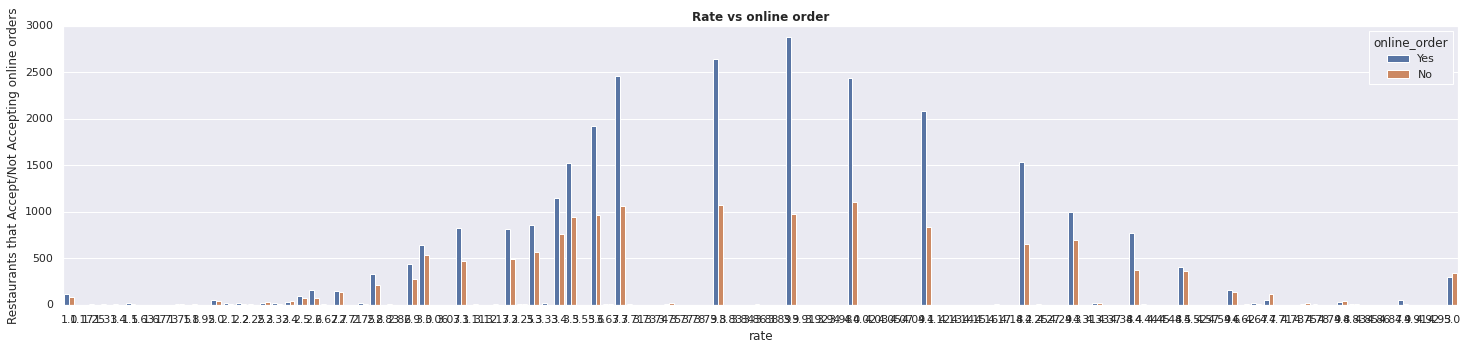

In [68]:
# Visualizing rate vs online order

plt.figure(figsize = (25, 5))
sns.countplot(x=zomato_data['rate'], hue=zomato_data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("Rate vs online order", weight = 'bold')

Text(0.5, 1.0, 'Rate vs Book Table')

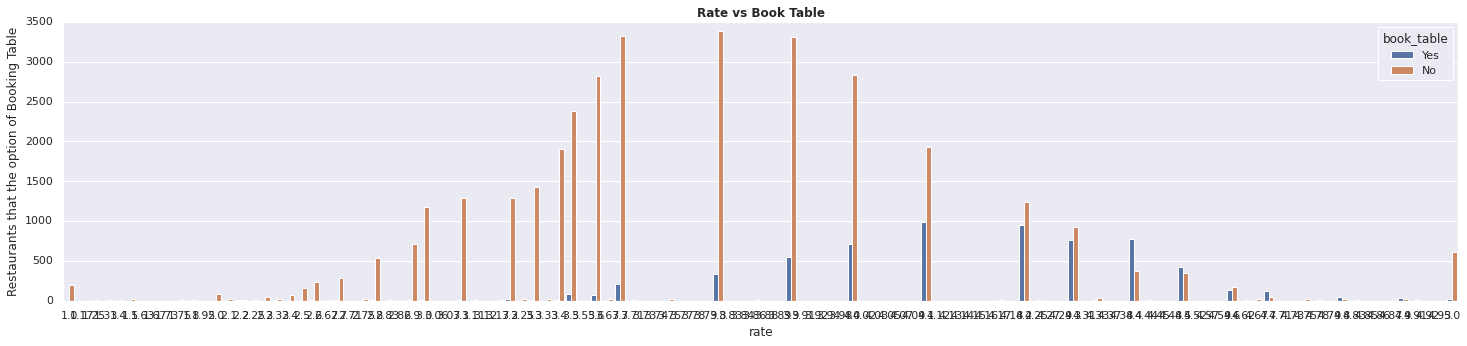

In [69]:
# Visualizing rate vs online order

plt.figure(figsize = (25, 5))
sns.countplot(x=zomato_data['rate'], hue=zomato_data['book_table'])
plt.ylabel("Restaurants that the option of Booking Table")
plt.title("Rate vs Book Table", weight = 'bold')

Text(0.5, 1.0, 'Rate vs Votes')

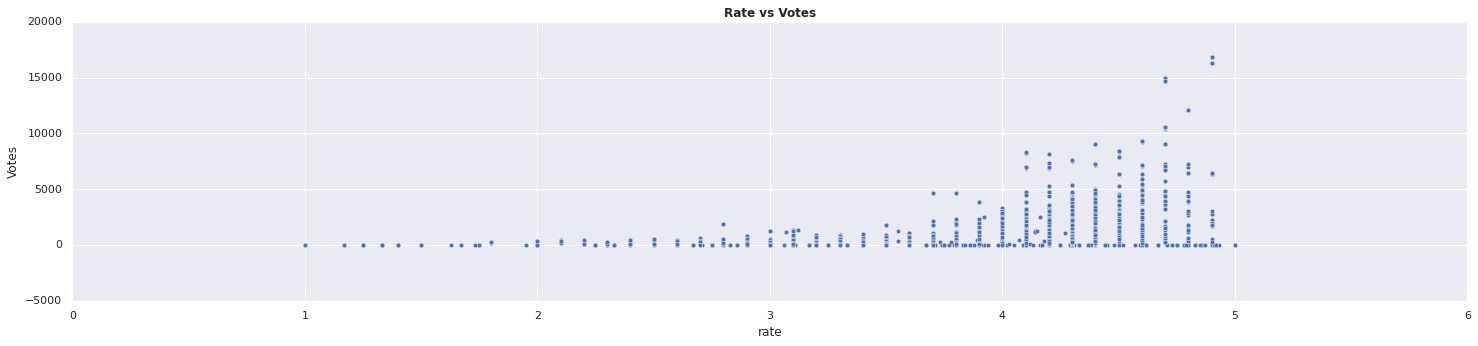

In [70]:
# Visualizing rate vs online order

plt.figure(figsize = (25, 5))
sns.scatterplot(data=zomato_data, x="rate", y="votes")
plt.ylabel("Rate")
plt.ylabel("Votes")
plt.title("Rate vs Votes", weight = 'bold')

##### Obsevations:
1. The rate seems to increase as the number of votes increase.

Text(0.5, 1.0, 'Rate vs Average Cost')

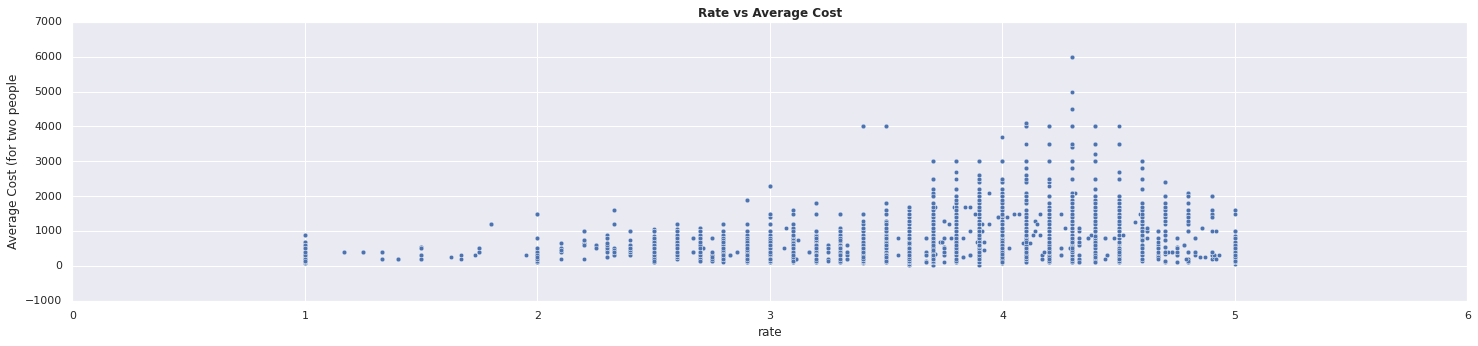

In [71]:
# Visualizing rate vs average cost

plt.figure(figsize = (25, 5))
sns.scatterplot(data=zomato_data, x="rate", y="average_cost")
plt.ylabel("Rate")
plt.ylabel("Average Cost (for two people")
plt.title("Rate vs Average Cost", weight = 'bold')

##### Observations:
1. As the average cost increases the rating seems to increase as well. This could probably be due to better food and services.

### **3.3 Feature Engineering**

Now that we have completed the data exploration part, we can start the Feature Engineering in order to prepare the data for the ML algorithms.

#### **3.3.1 Feature Encoding**

Handling the categorical features by encoding techniques.

In [72]:
# Reducing the number of locations by grouping together the infrequent locations

rare_locations = zomato_data["location"].value_counts()
rare_locations = rare_locations[rare_locations < 100].index

In [73]:
# Replacing the infrequent location by "Rest of Bangalore"

zomato_data["location"] = np.where(zomato_data["location"].isin(rare_locations), "Rest of Bangalore" ,zomato_data["location"])

In [74]:
# Encoding boolean features "Online Order" and "Book Table"

dict_boolean = {"Yes":1, "No":0}

zomato_data["online_order"] = zomato_data["online_order"].map(dict_boolean)
zomato_data["book_table"] = zomato_data["book_table"].map(dict_boolean)

In [75]:
# Extracting the top restaurant types 

rest_type_value_counts = pd.Series(rest_type_list).value_counts()
rest_type_to_exclude = rest_type_value_counts[rest_type_value_counts < 200].index
rest_type_to_include = rest_type_value_counts[rest_type_value_counts >= 200].index

In [76]:
# OHE based on top rest types and replacing the infrequent ones with "Others"

list_encoded_rest_type = []
def BooleanEncodingOfRestType(x):
    rest_type = x.lower().replace('dining','').strip().split(",")
    encode = np.zeros(len(rest_type_to_include)+1)
    for idx, rest in enumerate(rest_type):
        if rest in rest_type_to_include:
            encode[idx] = 1
    if np.sum(encode) == 0:
        encode[-1] = 1
    list_encoded_rest_type.append(encode)

In [77]:
# "rest_type" in OHE format

zomato_data["rest_type"].apply(BooleanEncodingOfRestType)
rest_type_ohe = pd.DataFrame(list_encoded_rest_type, columns=rest_type_to_include.tolist()+["others"])

In [78]:
# Calculate Number of Cuisines

def CalculateNumberOfCuisines(x):
    return len(x.split(","))

In [79]:
# Encoding the cuisines with number of cuisines

zomato_data["num_of_cuisines"] = zomato_data["cuisines"].apply(CalculateNumberOfCuisines)

In [80]:
# Encoding Locations

le1 = LabelEncoder()
locations = le1.fit_transform(zomato_data["location"])

ohe1 = OneHotEncoder()
locations_ohe = ohe1.fit_transform(locations.reshape(-1,1))
locations_ohe = pd.DataFrame(locations_ohe.toarray(), columns = ["locations_" + col for col in le1.classes_])

#### **3.3.2 Feature Scaling**

Scaling continuous features for faster convergence of ML algorithms.

In [81]:
# Applying MinMaxScaler on continuous features

scaler = MinMaxScaler()
votes_scaled = zomato_data[["votes"]]
avgcost_scaled = zomato_data[["average_cost"]]

In [82]:
votes_scaled["votes"] = scaler.fit_transform(votes_scaled[["votes"]])

In [83]:
avgcost_scaled["average_cost"] = scaler.fit_transform(avgcost_scaled[["average_cost"]])

#### **3.3.3 Dropping Unnecessary Features**

Dropping the features that are irrelevant.

In [84]:
# drop redudant features

zomato_data.drop(columns=["name", "location", "rest_type", "cuisines", "dish_liked", "cuisines", "dish_liked", "reviews_list", "menu_item", "listed_in(type)", "processed_review", "dish_from_review"], inplace  =True)

In [85]:
zomato_data.head()

online_order  book_table  rate  votes  average_cost  num_of_cuisines
0             1           1   4.1    775         800.0                3
1             1           0   4.1    787         800.0                3
2             1           0   3.8    918         800.0                3
3             0           0   3.7     88         300.0                2
4             0           0   3.8    166         600.0                2

## **4. Model Building**

Since the data has been prepare we can start the model building and try to obtain the best suited ML algorithm.

In [86]:
# Concatenating the features and preparing data for tree-based alogirthms

y = zomato_data[["rate"]]
X_tree =  pd.concat([zomato_data[["online_order", "book_table", "num_of_cuisines", "votes", "average_cost"]], locations_ohe, rest_type_ohe], axis = 1)

In [87]:
# Dropping one encoded feature to prevent overfitting

locations_ohe.drop([locations_ohe.columns[len(locations_ohe.columns)-1]], axis=1, inplace = True)

In [88]:
X_scaled = pd.concat([zomato_data[["online_order", "book_table", "num_of_cuisines"]], votes_scaled, avgcost_scaled, locations_ohe, rest_type_ohe], axis = 1)

### **4.1 Train/test Splitting**

We can split the data for train/test and segregate the independent and dependent features.



In [89]:
# Train Test Split for the tree based alogirthms

X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree.values, y.values, test_size=0.2, random_state=42)
print('X_train.shape: ', X_tree_train.shape, '\tX_test.shape: ', X_tree_test.shape, '\nY_train.shape: ', y_tree_train.shape, '\tY_test.shape: ', y_tree_test.shape)

X_train.shape:  (31961, 78) 	X_test.shape:  (7991, 78) 
Y_train.shape:  (31961, 1) 	Y_test.shape:  (7991, 1)


In [90]:
# Train Test Split for non-tree algorithms

X_nt_train, X_nt_test, y_nt_train, y_nt_test = train_test_split(X_scaled.values, y.values, test_size=0.2, random_state=42)
print('X_train.shape: ', X_nt_train.shape, '\tX_test.shape: ', X_nt_test.shape, '\nY_train.shape: ', y_nt_train.shape, '\tY_test.shape: ', y_nt_test.shape)

X_train.shape:  (31961, 77) 	X_test.shape:  (7991, 77) 
Y_train.shape:  (31961, 1) 	Y_test.shape:  (7991, 1)


### **4.2 Model Fitting**

Fitting various models and checking its accuracy.

In [104]:
# Regression metrics

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

def fcnPrintErrorMetrics(y_test, y_pred):
    print('R2:', metrics.r2_score(y_test, y_pred))
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#    sns.distplot(y_test - y_pred)

R2: 0.22226221658134726
MAE: 0.3226806830047084
MSE: 0.21384220515838956
RMSE: 0.46243075715007276


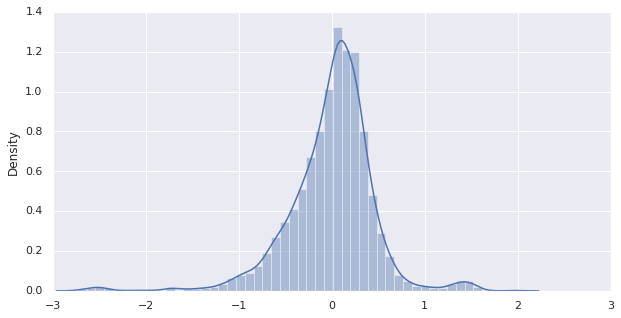

In [92]:
# Fitting Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_nt_train, y_nt_train)
y_pred1 = lin_reg.predict(X_nt_test)

fcnPrintErrorMetrics(y_nt_test, y_pred1)

R2: 0.22226303844422912
MAE: 0.32267103758371407
MSE: 0.21384197918380693
RMSE: 0.46243051281658193


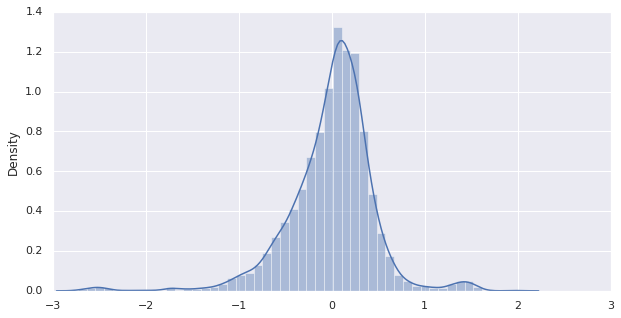

In [93]:
# Fiiting Ridge Regression

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_nt_train, y_nt_train)
y_pred2 = ridge_regressor.predict(X_nt_test)

fcnPrintErrorMetrics(y_nt_test, y_pred2)

R2: 0.22226303844422912
MAE: 0.32267103758371407
MSE: 0.21384197918380693
RMSE: 0.46243051281658193


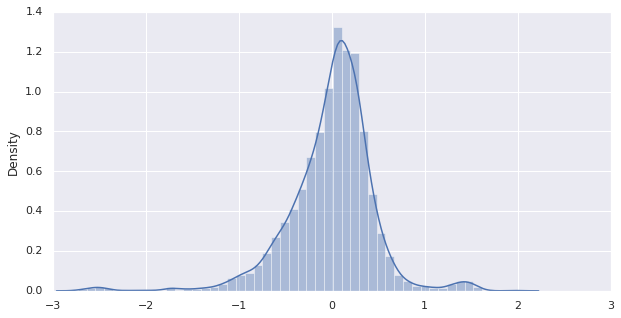

In [94]:
# Fiiting Lasso Regression

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_nt_train, y_nt_train)
y_pred3 = ridge_regressor.predict(X_nt_test)

fcnPrintErrorMetrics(y_nt_test, y_pred3)

R2: 0.20674340475126562
MAE: 0.317134791152342
MSE: 0.218109166355254
RMSE: 0.4670215908876741


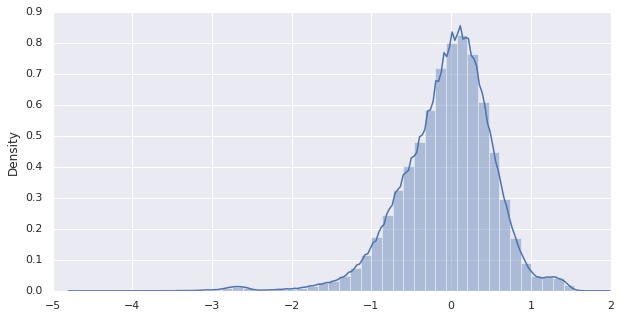

In [95]:
# Fiiting Linear SVM Regression

lsv_reg = LinearSVR()
lsv_reg.fit(X_nt_train, y_nt_train)
y_pred6 = lsv_reg.predict(X_nt_test)

fcnPrintErrorMetrics(y_nt_test, y_pred6)

In [105]:
# Fiiting SVM Regression

sv_reg = SVR()
sv_reg.fit(X_nt_train, y_nt_train)
y_pred7 = sv_reg.predict(X_nt_test)

fcnPrintErrorMetrics(y_nt_test, y_pred7)

R2: 0.25072129766828755
MAE: 0.30179479115383384
MSE: 0.20601726365990405
RMSE: 0.4538912465116551


In [106]:
# Fiiting DT Regression

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_tree_train, y_tree_train)
y_pred4 = dt_reg.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred4)

R2: 0.7880068927656431
MAE: 0.06241506936635116
MSE: 0.058288377517299095
RMSE: 0.2414298604508131


In [107]:
# Fiiting Random Forest Regression

rf_reg = RandomForestRegressor()
rf_reg.fit(X_tree_train, y_tree_train)
y_pred5 = rf_reg.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred5)

R2: 0.8307462599521225
MAE: 0.07942175452272274
MSE: 0.046537012570032385
RMSE: 0.21572439029936413


In [108]:
# Fiiting Adaboost Regression

ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X_tree_train, y_tree_train)
y_pred8 = ab_reg.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred8)

R2: 0.1749706012426232
MAE: 0.33742320631652567
MSE: 0.22684522947473723
RMSE: 0.4762827201093246


In [109]:
# Fiiting GBT Regression

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_tree_train, y_tree_train)
y_pred9 = gb_reg.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred9)

R2: 0.33134809621242234
MAE: 0.2792383861255693
MSE: 0.1838485934948106
RMSE: 0.42877569135249566


In [110]:
# Fiiting XGB Regression

xgb_reg = XGBRegressor()
xgb_reg.fit(X_tree_train, y_tree_train)
y_pred10 = xgb_reg.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred10)

[06:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.3298904181153769
MAE: 0.27938269673890365
MSE: 0.18424938808821856
RMSE: 0.42924280784681595


In [111]:
# Fiiting LGB Regression

lgb_reg = LGBMRegressor()
lgb_reg.fit(X_tree_train, y_tree_train)
y_pred11 = lgb_reg.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred11)

R2: 0.4536237229107408
MAE: 0.25314912248594235
MSE: 0.15022840657865394
RMSE: 0.3875930940801886


In [112]:
# Fiiting Catboost Regression

cat_reg = CatBoostRegressor()
cat_reg.fit(X_tree_train, y_tree_train)
y_pred12 = cat_reg.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred12)

Learning rate set to 0.072314
0:	learn: 0.5159156	total: 8.38ms	remaining: 8.37s
1:	learn: 0.5079257	total: 14.2ms	remaining: 7.07s
2:	learn: 0.5008532	total: 20ms	remaining: 6.64s
3:	learn: 0.4941638	total: 25.8ms	remaining: 6.43s
4:	learn: 0.4886824	total: 31.5ms	remaining: 6.26s
5:	learn: 0.4838018	total: 37.3ms	remaining: 6.17s
6:	learn: 0.4791815	total: 43.3ms	remaining: 6.14s
7:	learn: 0.4750060	total: 49.1ms	remaining: 6.09s
8:	learn: 0.4713134	total: 54.6ms	remaining: 6.01s
9:	learn: 0.4682613	total: 60.1ms	remaining: 5.95s
10:	learn: 0.4654568	total: 65.6ms	remaining: 5.89s
11:	learn: 0.4631168	total: 71.2ms	remaining: 5.86s
12:	learn: 0.4609947	total: 77ms	remaining: 5.85s
13:	learn: 0.4591460	total: 82.7ms	remaining: 5.83s
14:	learn: 0.4571561	total: 88.2ms	remaining: 5.79s
15:	learn: 0.4553067	total: 94ms	remaining: 5.78s
16:	learn: 0.4535567	total: 99.6ms	remaining: 5.76s
17:	learn: 0.4522636	total: 105ms	remaining: 5.73s
18:	learn: 0.4511901	total: 111ms	remaining: 5.72s


In [131]:
# Using ANNs

model = Sequential()
model.add(Dense(50, input_dim=X_nt_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

In [132]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [133]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                3900      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 5,311
Trainable params: 5,311
Non-trainable params: 0
_________________________________________________________________


In [134]:
y_nt_train_ann = np.asarray(y_nt_train).astype('float32').reshape((-1,1))

In [135]:
training = model.fit(X_nt_train, y_nt_train_ann, epochs=100, batch_size=100)

Epoch 1/100
320/320 [==============================] - 0s 1ms/step - loss: 1.2070
Epoch 2/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2183
Epoch 3/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2144
Epoch 4/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2129
Epoch 5/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2118
Epoch 6/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2106
Epoch 7/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2101
Epoch 8/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2084
Epoch 9/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2060
Epoch 10/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2060
Epoch 11/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2034
Epoch 12/100
320/320 [==============================] - 0s 1ms/step - loss: 0.2015
Epoch 13/100


In [136]:
y_pred13 = model.predict(X_nt_test)
fcnPrintErrorMetrics(y_nt_test, y_pred13)

R2: 0.36343010147679766
MAE: 0.28087656545812084
MSE: 0.1750275140797398
RMSE: 0.41836289758980755


##### Observations:

RandomForest Regressor gives us the least rsme and highest R2 score out of all the algorithms. So we can take that model as the base and try to optimize its hyperparameters to obtain best possible model.

### **4.3 Hyperparameter Optimization**

Applying hyperparameter optimization techniques to select best parameters that give us high accuracy.

In [144]:
# Hyperparameter Optimization

def find_best_model(X, y):
    
    algos = {
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                "n_estimators" : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)],
                "max_depth" : [int(x) for x in np.linspace(5, 30, num = 6)], 
                "min_samples_split" : [2, 5, 10],
                "min_samples_leaf" : [1, 2, 4]
            }
        }
    }
    
    scores = []
    cv = KFold(n_splits=5, shuffle=True)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, scoring='neg_mean_squared_error', return_train_score=False, verbose=2, n_jobs = -1)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


model_scores = find_best_model(X_tree_test, y_tree_test)
model_scores

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.8min finished


model  best_score  \
0  random_forest   -0.139956   

                                         best_params  
0  {'n_estimators': 118, 'min_samples_split': 2, ...

In [147]:
model_scores["best_params"].values

array([{'n_estimators': 118, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 25}],
      dtype=object)

In [148]:
# Fiiting Random Forest Regression with optimized hyperparameter

rf_reg_f = RandomForestRegressor(n_estimators=118, min_samples_split=2, min_samples_leaf=1, max_depth=25)
rf_reg_f.fit(X_tree_train, y_tree_train)
y_pred14 = rf_reg_f.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred5)

R2: 0.8307462599521225
MAE: 0.07942175452272274
MSE: 0.046537012570032385
RMSE: 0.21572439029936413


### **4.4 Saving the Model**

Saving the model.

In [157]:
with open('zomato_rating_prediction.pickle','wb') as f:
    pickle.dump(rf_reg_f, f)

In [156]:
cat_feature_columns = {
    "locations" : [col for col in le1.classes_],
    "rest_type" : [col for col in rest_type_ohe.columns.tolist()],
    "data_columns" : [col for col in X_tree.columns],
}

with open("data_columns.json", "w") as f:
    f.write(json.dumps(cat_feature_columns))

## **5. Conclusion**

This project has built a model that can predict Bengalore Restaurant Rating. 

Many different regressors and ANNs were used in this project.

Out of various regression algorithms, RandomForest tends to give us most balanced performance with:
1.   R2: 0.8307462599521225
2.   MAE: 0.07942175452272274
3.   MSE: 0.046537012570032385
4.   RMSE: 0.21572439029936413
